# 求解函数极小值，感受初始点的选取对梯度优化的影响

## 一、这里引入一个函数：Himmelblau函数，图像如下，存在四个都为0的极小值，只是取0的位置有四个

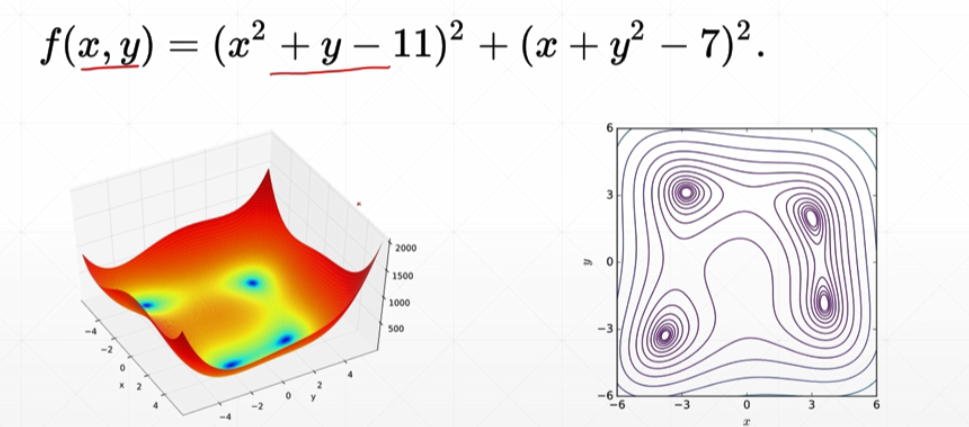

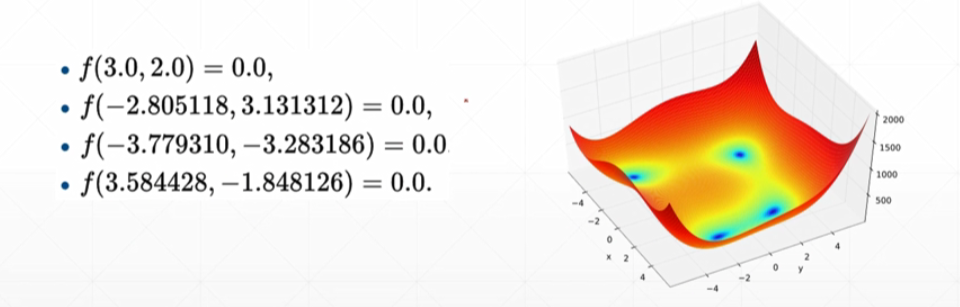

In [8]:
import tensorflow as tf
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

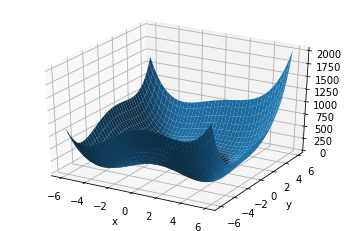

step0:x = [-2.98       -0.09999999],y=146.0
step20:x = [-3.6890156 -3.1276684],y=6.054738998413086
step40:x = [-3.7793102 -3.283186 ],y=0.0
step60:x = [-3.7793102 -3.283186 ],y=0.0
step80:x = [-3.7793102 -3.283186 ],y=0.0
step100:x = [-3.7793102 -3.283186 ],y=0.0
step120:x = [-3.7793102 -3.283186 ],y=0.0
step140:x = [-3.7793102 -3.283186 ],y=0.0
step160:x = [-3.7793102 -3.283186 ],y=0.0
step180:x = [-3.7793102 -3.283186 ],y=0.0


In [10]:
def himmelblau(x):
    return (x[0]**2 + x[1]-11)**2 + (x[0]+x[1]**2-7)**2
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)
Z = himmelblau([X,Y])

fig = plt.figure('himmeblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

x = tf.constant([-4.,0.])#随机设置一个初始点

for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
    grads = tape.gradient(y,[x])[0]
    x-=0.01*grads
    
    if step%20==0:
        print('step{}:x = {},y={}'.format(step,x.numpy(),y.numpy()))

## 当初始值设置为[-4,0]时得到最小值点为[-3.7793102 -3.283186 ]

In [11]:
def himmelblau(x):
    return (x[0]**2 + x[1]-11)**2 + (x[0]+x[1]**2-7)**2
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)
Z = himmelblau([X,Y])

x = tf.constant([4.,0.])#随机设置一个初始点

for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
    grads = tape.gradient(y,[x])[0]
    x-=0.01*grads
    
    if step%20==0:
        print('step{}:x = {},y={}'.format(step,x.numpy(),y.numpy()))

step0:x = [ 3.26       -0.09999999],y=34.0
step20:x = [ 3.5467901 -1.4388103],y=2.747403621673584
step40:x = [ 3.5843565 -1.8473402],y=1.7569736883160658e-05
step60:x = [ 3.584428  -1.8481257],y=2.273736580959973e-11
step80:x = [ 3.5844283 -1.8481264],y=1.818989620386291e-12
step100:x = [ 3.5844283 -1.8481264],y=1.818989620386291e-12
step120:x = [ 3.5844283 -1.8481264],y=1.818989620386291e-12
step140:x = [ 3.5844283 -1.8481264],y=1.818989620386291e-12
step160:x = [ 3.5844283 -1.8481264],y=1.818989620386291e-12
step180:x = [ 3.5844283 -1.8481264],y=1.818989620386291e-12


## 当初始值设置为[4,0]时得到最小值点为[ 3.5844283 -1.8481264]

In [13]:
def himmelblau(x):
    return (x[0]**2 + x[1]-11)**2 + (x[0]+x[1]**2-7)**2
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)
Z = himmelblau([X,Y])

x = tf.constant([3.3,2.])#随机设置一个初始点

for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
    grads = tape.gradient(y,[x])[0]
    x-=0.01*grads
    
    if step%20==0:
        print('step{}:x = {},y={}'.format(step,x.numpy(),y.numpy()))

step0:x = [3.04452 1.9382 ],y=3.662097930908203
step20:x = [3.0000784 1.9998106],y=9.78917569227633e-07
step40:x = [3.0000002 1.9999996],y=5.6843418860808015e-12
step60:x = [3.0000002 1.9999996],y=1.818989620386291e-12
step80:x = [3.0000002 1.9999996],y=1.818989620386291e-12
step100:x = [3.0000002 1.9999996],y=1.818989620386291e-12
step120:x = [3.0000002 1.9999996],y=1.818989620386291e-12
step140:x = [3.0000002 1.9999996],y=1.818989620386291e-12
step160:x = [3.0000002 1.9999996],y=1.818989620386291e-12
step180:x = [3.0000002 1.9999996],y=1.818989620386291e-12


## 当初始值设置为[3.3,2]时，得到最小值为[3.0000002 1.9999996]

# 综上，我们可以窥见初始值的取值确实会对神经网络的收敛和性能产生影响，需要注意